In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
# загрузим наш датасет и посмотрим на него
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Для начала будем предсказывать целевую переменную  просто удалив все пропуски и категориальные данные.

In [ ]:
df1 = df.drop(columns=['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']).copy()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [ ]:
df1.dropna(inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        714 non-null    int64  
 5   Parch        714 non-null    int64  
 6   Fare         714 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 44.6 KB


In [ ]:
# классы более менее сбалансированны
df1['Survived'].value_counts()

0    424
1    290
Name: Survived, dtype: int64

In [ ]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1.iloc[:, 2:], 
                                                    df1.Survived,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
# будем использовать метрики accuracy и roc_auc
accuracy_score(y_test, y_pred)

0.6993006993006993

In [ ]:
roc_auc_score(y_test, pipe.predict_proba(X_test)[:, 1])

0.7246510673234811

На таких грубообработанных данных модель показывает хороший результат, но его явно можно улучшить. 
Поэтому теперь подойдем к вопросу обработки пропусков и типов данных более ответственно. 

In [ ]:
# посмотрим на данные
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Попробуем определить, какие из признаков нам не нужны совсем. Во-первых, это ID пассажира, так как это просто его нумерация в датасете. 
Так же есть некоторые сомнения на счет номера билета. Посмотрим, что там есть.

In [ ]:
df.groupby(['Ticket']).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Ticket,,,,,,,,,,,
110152,3,3,3,3,3,3,3,3,3,3,3
110413,3,3,3,3,3,3,3,3,3,3,3
110465,2,2,2,2,2,1,2,2,2,2,2
110564,1,1,1,1,1,1,1,1,1,1,1
110813,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
W./C. 6608,4,4,4,4,4,4,4,4,4,0,4
W./C. 6609,1,1,1,1,1,0,1,1,1,0,1
W.E.P. 5734,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
df[df['Ticket'] == '110152']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5,B77,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5,B79,S
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S


Видно, что под одним номером билета бывает сразу несколько пассажиров, но они необязательно селятся в одну и ту же каюту. При чем, они не родственники похоже. Фамилии не совпадают, в колонках с детьми и родителями нули.
Сам по себе номер билета тоже ни о чем не говорит. На основе этого признака сделаем метку для общих и персональных билетов, а сам признак удалим вместе с ID пассажира.

In [ ]:
df['Ticket_share'] = \
          df['Ticket'].apply(
        lambda x: 1 if df[df['Ticket'] == x]['PassengerId'].count() > 1 else 0
        )

In [ ]:
df.drop(['Ticket', 'PassengerId'], axis=1, inplace=True)
df.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket_share
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,NaN,S,0


In [ ]:
# посмотрим на значения признака Name
df['Name'].unique()[:20]

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima'], dtype=object)

Видно, что в записи имени присутсвует некоторая закономерность - Фамилия, обращение, Имя.
Из обращения мы можем сделать несколько классов, которые могут дополнить признак Sex. 
Так же по фамилии мы можем попробовать далее восстановить какие-то из пропущенных данных. Имя вряд ли пригодится.

In [ ]:
df['SurName'] = df['Name'].apply(lambda x: x.split(', ')[0])

In [ ]:
df['SurName']

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: SurName, Length: 891, dtype: object

In [ ]:
df['Title'] = df['Name'].apply(lambda x: x.split(', ')[1])
df['Title'] = df['Title'].apply(lambda x: x.split('. ')[0])

In [ ]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [ ]:
# Теперь признак 'Name' можно удалить
df.drop(['Name'], axis=1, inplace=True)
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket_share,SurName,Title
0,0,3,male,22.0,1,0,7.25,NaN,S,0,Braund,Mr


In [ ]:
# преобразуем Title
df = pd.get_dummies(df, columns=['Title'], drop_first=True)

df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket_share,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,0,3,male,22.0,1,0,7.25,NaN,S,0,...,0,0,0,0,1,0,0,0,0,0


Теперь перейдем к признаку Sex. Это пол пассажира, в нем нет пропусков, поэтому все должно быть просто, но на всякий случай проверим, нет ли в нем каких-то некорректных значений.

In [ ]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
df.head(1)

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket_share,SurName,...,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Sex_male
0,0,3,22.0,1,0,7.25,NaN,S,0,Braund,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
# посмотрим на признак 'Cabin'
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

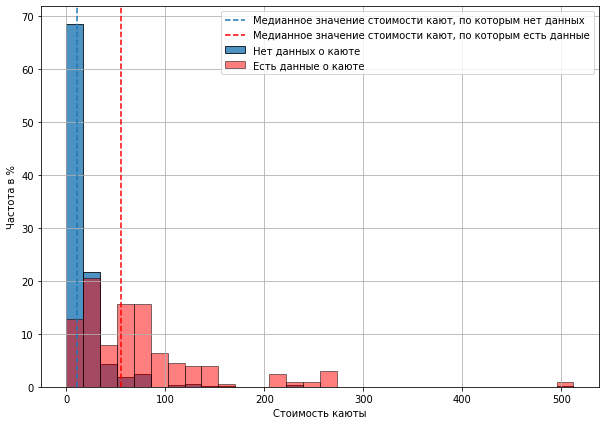

In [ ]:
# посмотрим на распределение стоимости билетов в зависимости от наличия 'Cabin'
plt.figure(figsize=(10,7))

data1 = df[df['Cabin'].isna()]['Fare']
data2 = df[~df['Cabin'].isna()]['Fare']

plt.hist(data1, bins=30, edgecolor='black', alpha=.8, 
         label='Нет данных о каюте', 
         weights=np.ones_like(data1) * 100 / data1.size)
plt.hist(data2, bins=30, edgecolor='black', alpha=.5, 
         weights=np.ones_like(data2) * 100 / data2.size, 
         label='Есть данные о каюте', 
         color='red')

plt.axvline(data1.median(), ls='--', 
            label='Медианное значение стоимости кают, по которым нет данных')
plt.axvline(data2.median(), ls='--', color='red',
            label='Медианное значение стоимости кают, по которым есть данные')
plt.xlabel('Стоимость каюты')
plt.ylabel('Частота в %')
plt.legend()
plt.grid()
plt.show()

In [ ]:
surv_nan = df[df['Cabin'].isna()].groupby('Survived')['Pclass'].count()[1] / \
            df[df['Cabin'].isna()]['Pclass'].count() * 100

surv_is = df[~df['Cabin'].isna()].groupby('Survived')['Pclass'].count()[1] / \
            df[~df['Cabin'].isna()]['Pclass'].count() * 100

print(f"Выживших среди тех, у кого нет данных о билете: {round(surv_nan)}%")
print(f"Выживших среди тех, у кого есть данные о билете: {round(surv_is)}%")

Выживших среди тех, у кого нет данных о билете: 30%
Выживших среди тех, у кого есть данные о билете: 67%


Как видно из процентного соотношения выживших - сам факт наличия информации о номере билета может что-то сказать о том выжил ли человек. 
Согласно графику большинство билетов, о которых нет информации, более дешевые, и, значит, их владельцы жили в большинстве на нижних палубах, где шансов выжить было меньше, а следовательно, и установить номер билета пассажира уже после крушения было заруднительным. 
Поэтому не будем удалять этот признак совсем, а трансформируем его, оставив только данные о том, есть или нет номера билета у данного пассажира. Но сперва попробуем восстановить данные на сколько это возможно.

In [ ]:
df_grouped = df.groupby('SurName').count().copy().reset_index()

In [ ]:
surnames = df_grouped[df_grouped['Survived'] > 1]['SurName'].to_list()

In [ ]:
len(set(surnames))

133

In [ ]:
surnames_na = \
df[(df['SurName'].isin(surnames)) & (df['Cabin'].isna())]['SurName'].to_list()

In [ ]:
len(set(surnames_na))

103

In [ ]:
surnames_is = \
df[(df['SurName'].isin(surnames)) & (~df['Cabin'].isna())]['SurName'].to_list()

In [ ]:
len(set(surnames_is))

44

In [ ]:
surnames1 = [surname for surname in set(surnames_is) if surname in set(surnames_na)]

In [ ]:
for surname in surnames1:
  print(df[df['SurName'] == surname].iloc[:, :10])

     Survived  Pclass   Age  SibSp  Parch     Fare Cabin Embarked  \
194         1       1  44.0      0      0  27.7208    B4        C   
345         1       2  24.0      0      0  13.0000   F33        S   
670         1       2  40.0      1      1  39.0000   NaN        S   
684         0       2  60.0      1      1  39.0000   NaN        S   

     Ticket_share SurName  
194             0   Brown  
345             0   Brown  
670             1   Brown  
684             1   Brown  
     Survived  Pclass   Age  SibSp  Parch     Fare Cabin Embarked  \
174         0       1  56.0      0      0  30.6958    A7        C   
260         0       3   NaN      0      0   7.7500   NaN        Q   
284         0       1   NaN      0      0  26.0000   A19        S   
346         1       2  40.0      0      0  13.0000   NaN        S   

     Ticket_share SurName  
174             0   Smith  
260             0   Smith  
284             0   Smith  
346             0   Smith  
     Survived  Pclass   Age 

In [ ]:
# про этих двух дам есть информация, что они родственницы и плыли вместе
df[df['SurName'] == 'Wick']

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket_share,SurName,...,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Sex_male
318,1,1,31.0,0,2,164.8667,C7,S,1,Wick,...,1,0,0,0,0,0,0,0,0,0
856,1,1,45.0,1,1,164.8667,NaN,S,1,Wick,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df.loc[856:857, 'Cabin'] = 'C7'

In [ ]:
df[df['SurName'] == 'Wick']

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket_share,SurName,...,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Sex_male
318,1,1,31.0,0,2,164.8667,C7,S,1,Wick,...,1,0,0,0,0,0,0,0,0,0
856,1,1,45.0,1,1,164.8667,C7,S,1,Wick,...,0,0,0,0,1,0,0,0,0,0


По остальным пассажирам каких-либо данных, позволяющих восстановить номера кают, не нашлось.

In [ ]:
# тогда сделаем метку наличия номера билета у пассажира
df['IsCabin'] = df['Cabin'].apply(lambda x: 1 if isinstance(x, str) else 0)

In [ ]:
df[df['Cabin'].isna()]['IsCabin'].unique()

array([0])

In [ ]:
df[~df['Cabin'].isna()]['IsCabin'].unique()

array([1])

In [ ]:
# признаки 'Cabin' и 'SurName' больше не нужны
df.drop(['Cabin', 'SurName'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    int64  
 1   Pclass              891 non-null    int64  
 2   Age                 714 non-null    float64
 3   SibSp               891 non-null    int64  
 4   Parch               891 non-null    int64  
 5   Fare                891 non-null    float64
 6   Embarked            889 non-null    object 
 7   Ticket_share        891 non-null    int64  
 8   Title_Col           891 non-null    uint8  
 9   Title_Don           891 non-null    uint8  
 10  Title_Dr            891 non-null    uint8  
 11  Title_Jonkheer      891 non-null    uint8  
 12  Title_Lady          891 non-null    uint8  
 13  Title_Major         891 non-null    uint8  
 14  Title_Master        891 non-null    uint8  
 15  Title_Miss          891 non-null    uint8  
 16  Title_Ml

In [ ]:
# займемся признаком Age. Посмотрим на пропуски
df[df['Age'].isna()]

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Ticket_share,Title_Col,Title_Don,...,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Sex_male,IsCabin
5,0,3,NaN,0,0,8.4583,Q,0,0,0,...,0,0,1,0,0,0,0,0,1,0
17,1,2,NaN,0,0,13.0000,S,0,0,0,...,0,0,1,0,0,0,0,0,1,0
19,1,3,NaN,0,0,7.2250,C,0,0,0,...,0,0,0,1,0,0,0,0,0,0
26,0,3,NaN,0,0,7.2250,C,0,0,0,...,0,0,1,0,0,0,0,0,1,0
28,1,3,NaN,0,0,7.8792,Q,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,NaN,0,0,7.2292,C,0,0,0,...,0,0,1,0,0,0,0,0,1,0
863,0,3,NaN,8,2,69.5500,S,1,0,0,...,0,0,0,0,0,0,0,0,0,0
868,0,3,NaN,0,0,9.5000,S,0,0,0,...,0,0,1,0,0,0,0,0,1,0
878,0,3,NaN,0,0,7.8958,S,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
# заменим пропуски медианным значением по каждому титулу
titles = df.iloc[:,8:24].columns.to_list()

In [ ]:
for title in titles: 
   df.loc[(df[title] == 1) & df['Age'].isna(), 'Age'] = \
                            df[df[title] == 1]['Age'].median()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    int64  
 1   Pclass              891 non-null    int64  
 2   Age                 891 non-null    float64
 3   SibSp               891 non-null    int64  
 4   Parch               891 non-null    int64  
 5   Fare                891 non-null    float64
 6   Embarked            889 non-null    object 
 7   Ticket_share        891 non-null    int64  
 8   Title_Col           891 non-null    uint8  
 9   Title_Don           891 non-null    uint8  
 10  Title_Dr            891 non-null    uint8  
 11  Title_Jonkheer      891 non-null    uint8  
 12  Title_Lady          891 non-null    uint8  
 13  Title_Major         891 non-null    uint8  
 14  Title_Master        891 non-null    uint8  
 15  Title_Miss          891 non-null    uint8  
 16  Title_Ml

In [ ]:
# остался признак 'Embarked'
df[df['Embarked'].isna()]

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Ticket_share,Title_Col,Title_Don,...,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Sex_male,IsCabin
61,1,1,38.0,0,0,80.0,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,1
829,1,1,62.0,0,0,80.0,NaN,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# заполним пропуски самым частым значением и трансфоримруем признак
df['Embarked'].fillna('S', inplace=True)

In [ ]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df.head(1)

,Survived,Pclass,Age,SibSp,Parch,Fare,Ticket_share,Title_Col,Title_Don,Title_Dr,...,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Sex_male,IsCabin,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.25,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [ ]:
# у нас не осталось пропусков и все типы данных подходят для обучения модели
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    int64  
 1   Pclass              891 non-null    int64  
 2   Age                 891 non-null    float64
 3   SibSp               891 non-null    int64  
 4   Parch               891 non-null    int64  
 5   Fare                891 non-null    float64
 6   Ticket_share        891 non-null    int64  
 7   Title_Col           891 non-null    uint8  
 8   Title_Don           891 non-null    uint8  
 9   Title_Dr            891 non-null    uint8  
 10  Title_Jonkheer      891 non-null    uint8  
 11  Title_Lady          891 non-null    uint8  
 12  Title_Major         891 non-null    uint8  
 13  Title_Master        891 non-null    uint8  
 14  Title_Miss          891 non-null    uint8  
 15  Title_Mlle          891 non-null    uint8  
 16  Title_Mm

Прежде, чем обучать модель, создам несколько датасетов с разным набором данных. Посмотрим, на сколько будут влиять на обучение добавленные признаки IsCabin и Ticket_share, а так же, на сколько нужен признак пола Sex_male, так как по титулу всегда можно понять пол.

In [ ]:
df_isCabin = df.drop(['Ticket_share'], axis=1)
df_ticketShare = df.drop(['IsCabin'], axis=1)
df_woSex = df.drop(['Sex_male'], axis=1)
df_no_cab_no_sex = df.drop(['IsCabin', 'Sex_male'], axis=1)
df_no_cab_no_tic = df.drop(['IsCabin', 'Ticket_share'], axis=1)
df_no_sex_no_tic = df.drop(['Sex_male', 'Ticket_share'], axis=1)
df_noAll = df.drop(['IsCabin', 'Sex_male', 'Ticket_share'], axis=1)

In [ ]:
def model_quality(data):
  """
    функция, обучающая логистическую регрессию на входных данных
    возвращает метрики accuracy и roc_auc
    data: датасет
  """
  x = data.iloc[:, 1:]
  y = data.Survived

  X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                      test_size=0.2,
                                                      random_state=42)
  
  pipe = make_pipeline(StandardScaler(), LogisticRegression())
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)

  acc = accuracy_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, pipe.predict_proba(X_test)[:, 1])
  return acc, roc_auc 

In [ ]:
acc, roc_auc = model_quality(df)
print(f'accuracy = {acc}, roc_auc = {roc_auc} для всех признаков.')

accuracy = 0.8268156424581006, roc_auc = 0.8907335907335907 для всех признаков.


In [ ]:
acc, roc_auc = model_quality(df_isCabin)
print(f'accuracy = {acc}, roc_auc = {roc_auc} без признака Ticket_share.')

accuracy = 0.8268156424581006, roc_auc = 0.8897039897039897 без признака Ticket_share.


In [ ]:
acc, roc_auc = model_quality(df_ticketShare)
print(f'accuracy = {acc}, roc_auc = {roc_auc} без признака isCabin.')

accuracy = 0.8156424581005587, roc_auc = 0.890862290862291 без признака isCabin.


In [ ]:
acc, roc_auc = model_quality(df_woSex)
print(f'accuracy = {acc}, roc_auc = {roc_auc} без признака пола.')

accuracy = 0.8156424581005587, roc_auc = 0.8889317889317889 без признака пола.


In [ ]:
acc, roc_auc = model_quality(df_no_cab_no_sex)
print(f'accuracy = {acc}, roc_auc = {roc_auc} без признаков IsCabin, Sex_male')

accuracy = 0.8044692737430168, roc_auc = 0.8879021879021879 без признаков IsCabin, Sex_male


In [ ]:
acc, roc_auc = model_quality(df_no_cab_no_tic)
print(f'accuracy = {acc}, roc_auc = {roc_auc} без признаков IsCabin, Ticket_share')

accuracy = 0.8156424581005587, roc_auc = 0.8908622908622909 без признаков IsCabin, Ticket_share


In [ ]:
acc, roc_auc = model_quality(df_no_sex_no_tic)
print(f'accuracy = {acc}, roc_auc = {roc_auc} без признаков Sex_male, Ticket_share')

accuracy = 0.8212290502793296, roc_auc = 0.8879021879021879 без признаков Sex_male, Ticket_share


In [ ]:
acc, roc_auc = model_quality(df_noAll)
print(f'accuracy = {acc}, roc_auc = {roc_auc} без признаков Sex_male, Ticket_share, IsCabin')

accuracy = 0.8100558659217877, roc_auc = 0.8875160875160875 без признаков Sex_male, Ticket_share, IsCabin


Как мы видим на всех датасетах метрики гораздо выше, чем на необработанных данных. Что касается обработанных данных, то признак IsCabin немного ухудшает качество работы модели согласно roc_auc, а без признака Ticket_share ее качество еще немного увеличивается. Что же касается accuracy, то тут хорошо себя показал датасет со всеми признаками, а так как roc_auc у него тоже достаточно высокий, я бы отдал предпочтение модели, обученной именно на нем.